In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')



### **Context**

TLC (Taxi and Limousine Commission) New York adalah badan pemerintah yang bertanggung jawab atas regulasi dan pengawasan layanan taksi, limusin, dan kendaraan sewaan lainnya di New York City. TLC bertanggung jawab memberi izin kepada pengemudi taksi, kendaraan yang digunakan, hingga menentukan standar tarif untuk taksi-taksi yang beroperasi di daerah new york.


TLC memiliki target untuk meningkatkan jumlah kendaraan yang dapat diakses oleh individu dengan disabilitas seperti pengguna kursi roda hingga 50%. Kendaraan terkait berupa Nissan NV200 atau 'The Taxi of Tomorrow' yaitu armada yang telah diakui oleh TLC sudah sesuai untuk memfasilitasi penumpang pengguna kursi roda. 

Dengan target baru ini, kita ingin mencari tahu kesiapan layanan taksi di new york city secara menyeluruh hingga dapat mengambil langkah lebih lanjut dan memprioritaskan para penumpang kursi roda.


**Stakeholder :**
- Pengatur Regulasi (Regulatory Authorities) dari pihak Taxi and Limousine Commission (TLC) di New York: Pihak yang mengatur tarif taksi, yang bertanggung jawab untuk menetapkan dan mengawasi tarif taksi

Pertanyaan utama : Apakah layanan taksi di new york city selama 2022-2023 sudah baik? 

Masalah : 

**Apakah taksi menjadi pilihan masyarakat?**
1. Mencari tahu apakah tarif yang diberikan kepada pelanggan sudah sesuai atau memuaskan. 
2. Apakah penggunaan itu meningkat atau tidak?
3. Apakah taksi menjadi pilihan bagi penumpang group-ride? 
4. Apakah taksi menjadi pilihan untuk pelanggan yang ingin berpergian jauh?
5. Kepuasan pelanggan dalam penggunaan layanan taksi

**Apakah layanan taksi sudah sesuai regulasi?**
1. Apakah MTA Tax dan improvement surcharge yang dikenakan sudah sesuai regulasi?
2. Apakah peraturan terkait tarif telah diaplikasikan secara teratur?
3. Apakah peraturan tarif sudah cukup memadai?
4. Sudah sesuaikah pengenaan congestion_surcharge?

**Apakah sistem layanan taksi sudah optimal?**

1. Melihat vendor yang lebih cepat dalam menanggulangi data perjalanan
2. Apakah integrasi pemesanan taksi ke sistem teknologi itu dimanfaatkan pelanggan?

## **I. Data Understanding**

1. Vendor ID : Id perusahaan yang menyediakan rekaman data
2. LPEP_pickup_datetime : waktu dan tanggal agrometer mulai menghitung atau waktu pickup pelanggan
3. LPEP_dropoff_datetime : waktu dan tanggal agrometer terakhir menghitung atau waktu dropoff pelanggan
4. Passenger-count : jumlah pelanggan yang naik taksi tersebut
5. Trip_distance : jarak yang ditempuh
6. PULocationID : zona pickup
7. DOLocationID : zona dropoff
8. RateCodeID : code yang menandakan kategori tarif yang dikenakan pelanggan
    - 1 yaitu Standard Rate
    - 2 yaitu JFK, jika perjalanannya berasal dari / berakhir di JFK airport, akan diberi flat rate atau tarif yang sudah ditetapkan (tidak menggunakan agrometer)
    - 3 yaitu Newark, jika perjalanannya berasal dari / berakhir di Newark airport, akan diberi flat rate
    - 4 yaitu Nassau or Westchester, melampaui daerah new york city sehingga tarif akan lebih tinggi
    - 5 yaitu Negotiated fare, dimana pelanggan menegosiasi untuk mendapatkan tarif tertentu terkait lokasi tujuan spesifik yang diluar zona misalnya kota kecil yang tidak umum dilalui taksi
    - 6 yaitu group ride, dimana beberapa orang dengan destinasi yang sama melakukan pembagian tarif. 
9. Store_and_fwd_flag : yes = data terkait perjalanan tertentu tersimpan di sistem sementara 
no = data terkait perjalanan tertentu tidak tersimpan karena langsung sampai ke sistem pusat
10. payment_type : tipe pembayaran (cash, atau credit card, atau tidak terkena pembayaran, atau tidak diketahui, atau dispute)
11. Fare_amount : tarif  
12. Extra : biaya yang akan ditambah 0.5 cent jika perjalanan dilakukan pada rush hour dan $1 jika pickup pada overnight yaitu umumnya jam 8 malam hingga 6 pagi,(seharusnya tidak lebih dari 1.5)
13. MTA_tax : pajak yang dikenakan untuk daerah new york yaitu $ 0.5 (biaya tidak boleh lebih)
14. Improvement surcharge : biaya $ 0.30 per trip yang digunakan untuk meningkatkan kualitas sistem teknologi yang ada di taksi dan sebagainya. (biaya tidak boleh lebih)
15. Tip_amount : jumlah tips yang diberi 
16. Tolls_amount : jumlah bayar tol
17. Total_amount : jumlah yang dibayarkan tidak termasuk tips
18. Trip_type : melihat apakah pelanggan melakukan pemesanan taksi sebelumnya atau tidak
19. Congestion_surcharge : biaya yang dikenakan untuk daerah manhattan atau CBD (Central Business District) yang berupa fixed fee (2.5 dollar Weekday, 2.75 dollar Weekend).


### Dataset read and information

In [3]:
# Membaca file csv
df = pd.read_csv('NYC TLC Trip Record.csv')

In [4]:
# Informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

Terdapat 14 kolom tipe float, 3 kolom tipe integer, dan  3 kolom tipe objek. 

Secara sekilas, data yang kosong ada pada kolom :
- 'ehail_fee' yaitu null secara keseluruhan baris
- 'store_and_fwd_flag
- 'RateCodeID' 
- 'passenger_count'
- 'payment_type'
- 'trip_type'
- 'congestion_surcharge'

In [5]:
# first 5 rows of the dataset 
df.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00
3,1,2023-01-01 00:13:14,2023-01-01 00:19:03,N,1.0,41,238,1.0,1.30,6.5,0.5,1.5,1.70,0.0,NaN,1.0,10.20,1.0,1.0,0.00
4,1,2023-01-01 00:33:04,2023-01-01 00:39:02,N,1.0,41,74,1.0,1.10,6.0,0.5,1.5,0.00,0.0,NaN,1.0,8.00,1.0,1.0,0.00


Data ini terdiri dari rekaman setiap perjalanan,dimana setiap barisnya berisi:
- Waktu pickup dan dropoff setiap trip taksi (dalam format tanggal dan waktu),
- Penyimpanan sementara atau tidaknya data sebuah trip,
- Kode perjalanan,
- ID lokasi pickup dan dropoff ,
- Jumlah penumpang per armada tersebut, 
- Jarak yang ditempuh,
- Tarif yang dikenakan,
- Biaya-biaya tambahan,
- Pajak MTA,
- Jumlah tip,
- Biaya untuk peningkatan layanan taksi,
- Total harga yang dikenakan,
- Jenis pembayaran,
- Jenis perjalanan (pesan online atau tidak)
- Biaya yang dikenakan pada taksi daerah manhattan

### I. Unique and Null Values

In [6]:
# Mencari unique values, proporsi dan jumlah null values, serta contoh valuesnya pada setiap kolom
list = []
for i in df.columns :
    list.append([i, round(df[i].isna().sum()/len(df[i].isna())*100,2), df[i].nunique(),df[i].unique()])

pd.DataFrame(list, columns = ['Column name', 'Null values (%)', 'Number of unique', 'Several unique values'])

,Column name,Null values (%),Number of unique,Several unique values
0,VendorID,0.00,2,"[2, 1]"
1,lpep_pickup_datetime,0.00,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,0.00,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,6.34,2,"[N, Y, nan]"
4,RatecodeID,6.34,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,0.00,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,0.00,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,6.34,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,0.00,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,0.00,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


Dari tabel di atas dapat disimpulkan bahwa terdapat kolom-kolom data seperti berikut:

### Jenis kolom 

**Kolom Nominal**, kolom yang merepresentasikan kategori atau label :
1. RateCode ID 
2. Vendor ID
3. PULocation ID
4. DOLocation ID

**Kolom kategorikal kualitatif**, kolom kualitas kategoris :
1. store_and_fwd_flag

**Kolom kuantitatif**, yaitu kolom continuous atau discrete :
1. Passenger_count (discrete)
2. Sisanya (continuous)


### Data Kosong

**Kolom dengan null values 100%**:
1. ehail_fee, sehingga drop saja kolom tersebut

**Kolom dengan sedikit null values dengan:** 
- Persentase yang sama (6.34 %), terdapat kemungkinan 5 kolom ini selalu kosong secara bersamaan
    1. store_and_fwd_flag  
    2. RatecodeID
    3. passenger_count
    4. payment_type
    5. congestion_surcharge
- Persentase yang berbeda 
    1. trip_type (6.35 %)

### Anomali Data
Terdapat beberapa anomali dalam data yaitu: 

**Rate code ID:** 
1. 99.0 (yang tidak terdefinisi sebagai code apa)

**Kolom-kolom numerik:** 
1. Memiliki nilai minus contohnya mta_tax -0.5



In [7]:
# Melakukan pengecekan salah satu kolom dengan null_values 6.34% yaitu store_and_fwd_flag  
df[df['store_and_fwd_flag'].isna()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Jumlah baris dengan kolom 'store_and_fwd_flag' adalah 4324. Sehingga perlu dicek apakah kolom-kolom (RatecodeID, passenger_count, payment_type, congestion_surcharge) dengan persentase null values yang sama, secara bersamaan null. 

In [8]:
# Melihat null values terjadi secara bersamaan pada kolom-kolom dengan null 6.34%
df[(df['store_and_fwd_flag'].isna())&(df['RatecodeID'].isna())&(df['passenger_count'].isna())&(df['payment_type'].isna())&(df['congestion_surcharge'].isna())]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
63887,2,2023-01-01 00:28:00,2023-01-01 00:54:00,NaN,NaN,7,17,NaN,9.33,36.03,0.0,0.0,7.41,0.0,NaN,1.0,44.44,NaN,NaN,NaN
63888,2,2023-01-01 00:39:00,2023-01-01 00:52:00,NaN,NaN,37,37,NaN,2.67,14.55,0.0,0.0,3.11,0.0,NaN,1.0,18.66,NaN,NaN,NaN
63889,2,2023-01-01 00:58:00,2023-01-01 01:21:00,NaN,NaN,80,7,NaN,7.39,32.13,0.0,0.0,6.63,0.0,NaN,1.0,39.76,NaN,NaN,NaN
63890,2,2023-01-01 00:35:00,2023-01-01 00:55:00,NaN,NaN,169,42,NaN,4.04,17.85,0.0,0.0,0.00,0.0,NaN,1.0,18.85,NaN,NaN,NaN
63891,2,2023-01-01 00:45:00,2023-01-01 00:55:00,NaN,NaN,42,262,NaN,3.86,19.67,0.0,0.0,4.68,0.0,NaN,1.0,28.10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68206,2,2023-01-31 22:29:00,2023-01-31 22:42:00,NaN,NaN,49,62,NaN,4070.82,15.70,0.0,0.0,0.00,0.0,NaN,1.0,16.70,NaN,NaN,NaN
68207,2,2023-01-31 22:40:00,2023-01-31 22:48:00,NaN,NaN,10,205,NaN,2.14,4.41,0.0,0.0,0.00,0.0,NaN,1.0,5.41,NaN,NaN,NaN
68208,2,2023-01-31 23:46:00,2023-02-01 00:02:00,NaN,NaN,66,37,NaN,3.44,16.53,0.0,0.0,3.51,0.0,NaN,1.0,21.04,NaN,NaN,NaN
68209,2,2023-01-31 23:01:00,2023-01-31 23:19:00,NaN,NaN,225,189,NaN,3.03,14.98,0.0,0.0,3.20,0.0,NaN,1.0,19.18,NaN,NaN,NaN


Dengan kondisi memunculkan hanya baris-baris dengan kolom null values 6.34% saja, jumlah baris masih sama dengan sebelumnya yaitu 4324 baris sehingga kolom-kolom ini akan dihilangkan di data cleaning

### II. Duplicated values and upnormal values search

In [9]:
# check duplicated values
df[df.duplicated()]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge


Tidak terdapat duplikasi baris berdasarkan semua kolom yang ada.

In [10]:
# Fungsi untuk melakukan pengecekan nilai minus yang terduplikasi dan tidak 
def duplicatpay(namakolom):
    listdup = 0
    listidakdup = 0 
    valuetidakdup = []
    valuedup= []
    for i in df['lpep_pickup_datetime'][df[namakolom]<0] : 
        if len(df[df['lpep_pickup_datetime']==i]) >= 2 :
            listdup +=1
            valuedup.append(i)
        elif len(df[df['lpep_pickup_datetime']==i]) <2: 
            listidakdup +=1
            valuetidakdup.append(i)
    return listdup, valuedup, listidakdup, valuetidakdup

In [11]:
# Melihat kolom-kolom nominal yang bernilai < 0 / minus 
pay = ['fare_amount','mta_tax', 'extra','improvement_surcharge','total_amount','tip_amount','tolls_amount','congestion_surcharge']
paylis = []
for i in pay:
    dup,notdup, dupsam, notdupsam= duplicatpay(i)
    paylis.append([i,len(df[df[i]<0]),dup, notdup, dupsam, notdupsam])
#notdup,dupsam,notdupsam

pd.DataFrame(paylis, columns = ['Columns with payment','Number of minus', 'Duplicated','Duplicated Sample (Pickupdatetime)','Not Duplicated','Not duplicated sample (Pickupdatetime)'])


,Columns with payment,Number of minus,Duplicated,Duplicated Sample (Pickupdatetime),Not Duplicated,Not duplicated sample (Pickupdatetime)
0,fare_amount,176,173,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",3,"[2023-01-05 10:51:00, 2023-01-10 10:00:00, 202..."
1,mta_tax,165,165,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",0,[]
2,extra,80,80,"[2023-01-02 02:05:08, 2023-01-04 16:13:03, 202...",0,[]
3,improvement_surcharge,174,174,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",0,[]
4,total_amount,179,176,"[2023-01-01 14:58:13, 2023-01-01 17:24:52, 202...",3,"[2023-01-05 10:51:00, 2023-01-10 10:00:00, 202..."
5,tip_amount,9,9,"[2023-01-03 11:43:10, 2023-01-05 12:33:18, 202...",0,[]
6,tolls_amount,0,0,[],0,[]
7,congestion_surcharge,3,3,"[2023-01-17 18:57:59, 2023-01-19 08:25:38, 202...",0,[]


In [12]:
# Melihat salah satu sample baris yang terduplikasi (contoh yaitu dari sample mta_tax)
df[df['lpep_pickup_datetime']=='2023-01-01 14:58:13']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,NaN,-1.0,-4.5,3.0,1.0,0.0
663,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,3.0,0.0,0.5,0.0,0.0,NaN,1.0,4.5,3.0,1.0,0.0


In [13]:
# Melihat salah satu sample baris yang tidak terduplikasi (contoh yaitu dari sample fare_amount)
df[df['lpep_pickup_datetime']=='2023-01-05 10:51:00']

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
64487,2,2023-01-05 10:51:00,2023-01-05 11:20:00,NaN,NaN,116,151,NaN,2.22,-43.54,0.0,0.0,0.76,0.0,NaN,1.0,-41.78,NaN,NaN,NaN


1. Terdapat 6 kolom nominal ('mta_tax','extra','improvement_surcharge','tip_amount','congestion_surcharge') yang selalu memiliki duplikasi dimana yang membedakan adalah kolom nominal (baris 1 kolom nominal (-), baris 2 kolom nominal (+)).
    - Kolom-Kolom ini tidak selalu mengalami jumlah duplikasi yang sama sebab terdapat beberapa kolom seperti 'extra' yang tidak selalu kena biaya (bernilai 0.00)
    


2. Sisa 2 kolom lainnya('fare_amount', 'total_amount') memiliki non duplikat sebanyak 3 baris dimana keduanya berhubungan (sample datetime untuk kedua kolomnya sama). 


### III. Rangkuman

## **II. Data Cleaning**

### I. Dropping Column

In [14]:
# Menghapus kolom ehail fee karena seluruhnya null
df.drop(['ehail_fee'], axis = 1, inplace = True)

### II. Dropping Minus Rows

In [15]:
# Menghapus setiap baris yang memiliki nilai minus pada kolom total_amount
for i  in df[df['total_amount']<0].duplicated(subset=['lpep_pickup_datetime','lpep_dropoff_datetime'],keep = False).index:
    df.drop(i,axis= 0, inplace = True)

Kondisi yang dimasukkan hanya 'total_amount'<0 dimana jumlah barisnya nominal minusnya terbanyak (179 baris) sebab total_amount selalu harus terisi dan tidak mungkin tidak terkena cas seperti kolom lainnya. 

### III. Dropping Rows with Null values

In [16]:
# Melakukan penghapusan baris yang berisi null values berdasarkan 4 kolom dibawah karena letak null values yang berhubungan
df.dropna(subset =['store_and_fwd_flag','RatecodeID','passenger_count','payment_type'], axis = 0, inplace = True)

### IV. Dropping Rows based on null values on 'trip_type' column

In [17]:
# Melihat baris-baris berdasarkan null values yang ada pada kolom trip_type(kolom dengan persentase null yang berbeda)
display(df[df['trip_type'].isna()])
len(df[df['trip_type'].isna()])

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
1084,1,2023-01-01 19:44:13,2023-01-01 19:58:30,N,99.0,150,55,1.0,3.3,18.2,0.0,1.5,0.0,0.0,1.0,19.7,1.0,NaN,0.0
2174,1,2023-01-02 16:39:05,2023-01-02 17:31:42,N,99.0,73,82,1.0,3.7,23.5,0.0,1.5,0.0,0.0,1.0,25.0,1.0,NaN,0.0
9055,1,2023-01-05 20:33:45,2023-01-05 22:46:41,N,99.0,14,123,1.0,6.2,28.2,0.0,1.5,0.0,0.0,1.0,29.7,1.0,NaN,0.0
14125,1,2023-01-08 11:36:41,2023-01-08 12:14:59,N,99.0,61,77,1.0,2.7,22.5,0.0,1.5,0.0,0.0,1.0,24.0,1.0,NaN,0.0
29143,1,2023-01-15 13:51:42,2023-01-15 14:37:38,N,99.0,108,181,1.0,6.5,24.2,0.0,1.5,0.0,0.0,1.0,25.7,1.0,NaN,0.0
29711,1,2023-01-15 17:52:52,2023-01-15 22:11:55,N,99.0,150,123,1.0,1.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
35975,1,2023-01-19 01:07:59,2023-01-19 01:17:19,N,99.0,90,68,1.0,0.6,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
37691,1,2023-01-19 17:16:59,2023-01-19 22:29:53,N,99.0,265,123,1.0,14.6,40.2,0.0,1.5,0.0,0.0,1.0,41.7,1.0,NaN,0.0
42432,1,2023-01-21 20:29:58,2023-01-22 02:59:25,N,99.0,150,123,1.0,1.4,15.2,0.0,1.5,0.0,0.0,1.0,16.7,1.0,NaN,0.0
45204,1,2023-01-23 13:45:11,2023-01-23 23:36:42,N,99.0,244,248,1.0,28.3,50.2,0.0,1.5,0.0,0.0,1.0,51.7,1.0,NaN,0.0


10

Terdapat 10 baris yang memiliki null values pada trip_type dimana RatecodeIDnya adalah 99.0 (tidak mewakili rate code apapun pada dictionary), sehingga 10 baris ini akan dihapus.

In [18]:
# Menghapus 10 baris terkait
df.dropna(subset = ['trip_type'],axis = 0, inplace = True)

### V. Changing data type to datetime and adding new columns related to datetime

In [19]:
# Mengubah data datetime pickup dan dropoff menjadi datetime datatype
df['lpep_pickup_datetime']= pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime']= pd.to_datetime(df['lpep_dropoff_datetime'])

In [20]:
# Mengekstrak tahun dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_year']= df['lpep_pickup_datetime'].dt.year
df['lpep_dropoff_year']= df['lpep_dropoff_datetime'].dt.year


In [21]:
# Mengekstrak tanggal dari datetime pickup dan dropoff menjadi kolom baru
df['Pickup_date']= df['lpep_pickup_datetime'].dt.strftime("%d")
df['Dropoff_date']= df['lpep_dropoff_datetime'].dt.strftime("%d")

In [22]:
# Mengekstrak nama hari dari datetime pickup dan dropoff menjadi kolom baru
df['Pickup_day']= df['lpep_pickup_datetime'].dt.day_name()
df['Dropoff_day']= df['lpep_dropoff_datetime'].dt.day_name()


In [23]:
# Mengekstrak jam dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_hour'] = df['lpep_pickup_datetime'].dt.hour
df['lpep_dropoff_hour'] = df['lpep_dropoff_datetime'].dt.hour

In [24]:
# Mengekstrak waktu dari datetime pickup dan dropoff menjadi kolom baru
df['lpep_pickup_time'] = df['lpep_pickup_datetime'].dt.time
df['lpep_dropoff_time'] = df['lpep_dropoff_datetime'].dt.time

In [25]:
# Mencari lama durasi dari setiap perjalanan dan menambahkan menjadi kolom baru
df['Duration of trip (seconds)']=(df['lpep_dropoff_datetime']-df['lpep_pickup_datetime']).dt.total_seconds()


In [26]:
# Mengelompokkan jam pickup datetime to time of day (new column)
def timeday(df) :
    if (df['lpep_pickup_hour'] > 6) and (df['lpep_pickup_hour'] < 12) :
        return 'Morning'
    elif(df['lpep_pickup_hour'] >= 12) and (df['lpep_pickup_hour'] < 18) :
        return 'Afternoon' 
    elif(df['lpep_pickup_hour'] >= 18) and (df['lpep_pickup_hour'] < 20) :
        return 'Evening' 
    else :
        return 'Overnight'
df['Time of the day'] = df.apply(timeday,axis=1)

### VI. Finding data below year 2023

In [27]:
# Menemukan baris-baris dengan tahun dibawah 2023
df[df['lpep_pickup_year']<2023]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Pickup_date,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day
298,2,2022-12-09 14:10:49,2022-12-09 14:22:26,N,1.0,7,56,1.0,5.37,16.0,...,09,09,Friday,Friday,14,14,14:10:49,14:22:26,697.0,Afternoon
318,2,2022-12-09 14:55:42,2022-12-09 15:33:06,N,1.0,260,164,1.0,5.48,25.5,...,09,09,Friday,Friday,14,15,14:55:42,15:33:06,2244.0,Afternoon
17874,2,2009-01-01 20:21:27,2009-01-02 11:07:31,N,1.0,65,178,1.0,7.72,34.5,...,01,02,Thursday,Friday,20,11,20:21:27,11:07:31,53164.0,Overnight


Terdapat 3 baris data dengan tahun perjalanan 2022 dan 2009. Sebab jumlah data terkait 2 tahun ini sangat sedikit, akan dihapus 3 baris tersebut

In [28]:
# Menghapus baris berdasarkan indeks
df.drop(index = [17874,298,318],axis = 0,inplace = True)

### VII. Adding tip or not indicator column

In [29]:
# Membuat kolom indikator pemberian tips (1) atau tidak (0)
list=[]
for i in df['tip_amount'] :
    if i <=0 :
        list.append(0)
    if i>0 :
        list.append(1)
df['tip or not'] = list

### VIII. Adding Related Location ID Zone

In [30]:
# Adding new columns filled with the zone of the related pickup locationID
zona = pd.read_csv('taxi+_zone_lookup.csv').set_index('LocationID')
dfz =df.join(zona, on='PULocationID')
dfz=dfz.rename(columns ={'Borough':'PUBorough','Zone':'PUZone','service_zone':'PU_service_zone'})

In [31]:
# Adding new columns filled with the zone of the related dropoff locationID
dfzona =dfz.join(zona, on='DOLocationID')
dfzona = dfzona.rename(columns ={'Borough':'DOBorough','Zone':'DOZone','service_zone':'DO_service_zone'})
dfzona.to_csv(r'C:\Users\sylvi\Documents\JCDS 2104\Modul 2\data+zona.csv')

### IX. Conclusion of data cleaning

1.	Menghapus kolom ehail fee
2.	Menghapus nilai minus berdasarkan total_amount <0
3.	Menghapus nilai null berdasarkan 4 kolom yaitu  ‘store_and_fwd_flag’,’RatecodeID’,’ passenger_count’,’payment_type’.
4.	Menghapus baris-baris dengan RatecodeID 99.0 yang disertai null values pada trip_type
5.	Mengubah tipe data waktu pickup dan dropoff menjadi datetime
6.	Mengambil tahun, tanggal, nama hari, jam, waktu, durasi dari datetime pickup dan dropoff menjadi kolom-kolom baru
7.	Kategorisasi jam menjadi ‘Morning’,’Afternoon’,’Evening’,’Overnight’
8.	Menghapus baris-baris yang terjadi pada tahun <2023
9.	Menambahkan kolom indikator memberi tip (1) atau tidak(0)

|No  |Kolom baru                    | Contoh nilai    |
|:--:|:----------------------------:|:---------------:|
|1   |lpep_pickup_year              |     2023        |
|2   |lpep_dropoff_year             |     2023        |
|3   |Pickup_date                   |      31         |
|4   |Dropoff_date                  |      31         |
|5   |Pickup_day                    |     Sunday      |
|6   |Dropoff_day                   |     Sunday      |
|7   |lpep_pickup_hour              |      16         |
|8   |lpep_dropoff_hour             |      16         |
|9   |lpep_pickup_time              |   23:00:12      |
|10  |lpep_dropoff_time             |   23:10:08      |
|11  |Duration of trip (seconds)    |    596.0        |
|12  |Time of the day               |  Overnight      |
|13  |Tip or not                    |      1          |

## **III. Data Analysis**

### I. Distribution

In [32]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
VendorID,63700.0,1.855495,0.351604,1.0,2.0,2.00,2.00,2.00
RatecodeID,63700.0,1.101523,0.619576,1.0,1.0,1.00,1.00,5.00
PULocationID,63700.0,97.691397,60.141650,1.0,74.0,75.00,116.00,265.00
DOLocationID,63700.0,138.374992,76.884531,1.0,74.0,138.00,222.00,265.00
passenger_count,63700.0,1.315604,0.979364,0.0,1.0,1.00,1.00,9.00
trip_distance,63700.0,2.582926,6.767900,0.0,1.1,1.80,3.06,1571.97
fare_amount,63700.0,16.134628,13.234022,0.0,9.3,12.80,19.10,490.00
extra,63700.0,0.885267,1.290239,0.0,0.0,0.00,1.00,12.50
mta_tax,63700.0,0.629965,0.362834,0.0,0.5,0.50,0.50,2.75
tip_amount,63700.0,2.047305,3.000444,0.0,0.0,1.46,3.22,222.22


Berdasarkan tabel di atas, hampir seluruh kolom mengalami distribusi tidak normal yaitu right skewed / positively skewed jika dilihat dari mean yang lebih besar dari median (50%) pada setiap kolomnya. 

Hanya terdapat kolom VendorID, lpep_pickup_hour,lpep_dropoff_hour, improvement_surcharge yang memiliki mean yang lebih kecil dari mediannya.

In [33]:
# Melihat distribusi berdasarkan beberapa data numerical yang non kategorical dengan boxplot
angka = ['trip_distance','fare_amount','tip_amount','total_amount','lpep_pickup_hour','lpep_dropoff_hour','Duration of trip (seconds)']

Distribution of trip_distance based on box plot and histogram


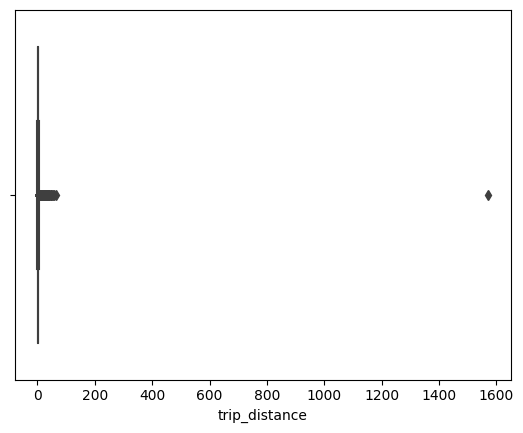

Distribution of fare_amount based on box plot and histogram


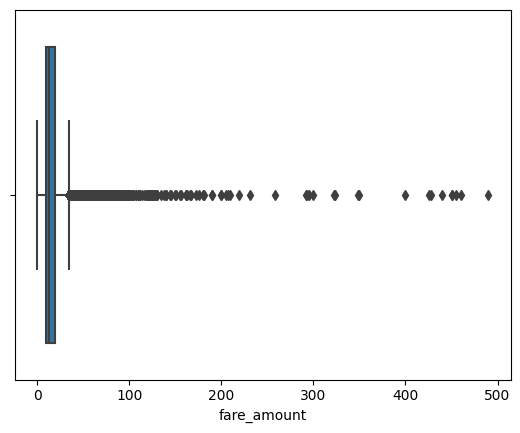

Distribution of tip_amount based on box plot and histogram


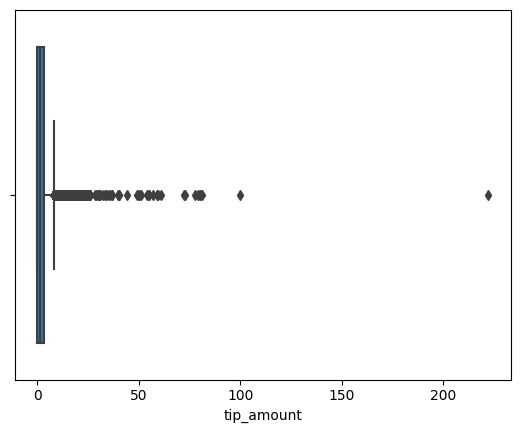

Distribution of total_amount based on box plot and histogram


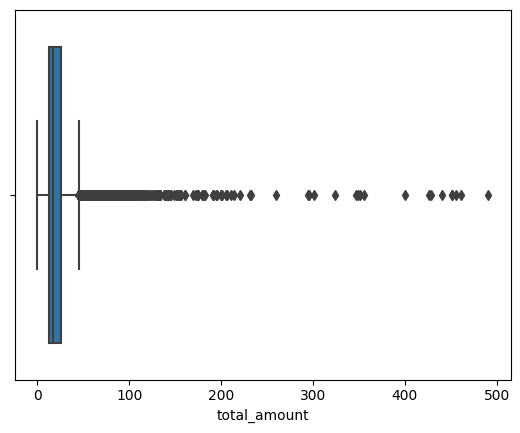

Distribution of lpep_pickup_hour based on box plot and histogram


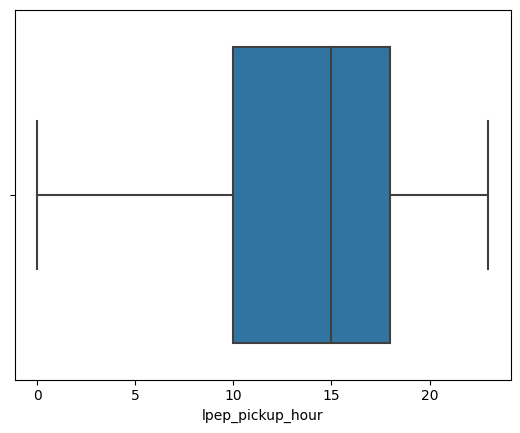

Distribution of lpep_dropoff_hour based on box plot and histogram


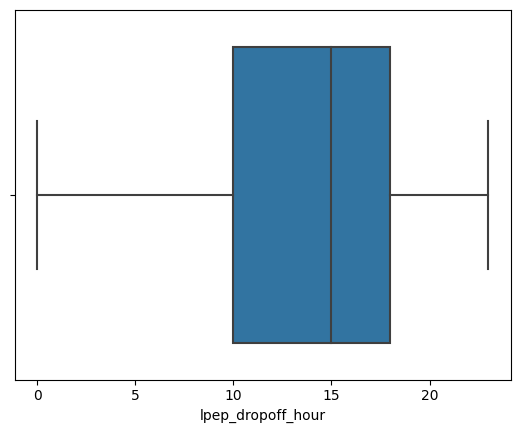

Distribution of Duration of trip (seconds) based on box plot and histogram


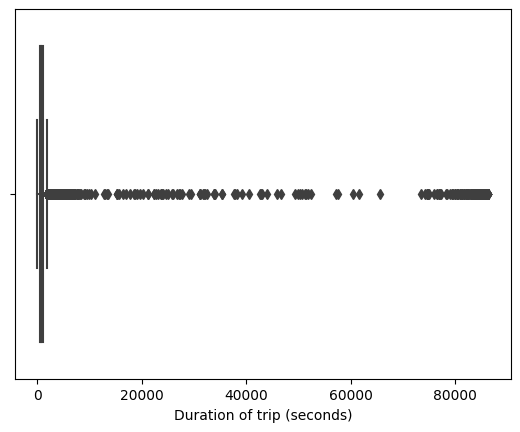

In [34]:
for i in angka:
    print(f'Distribution of {i} based on box plot and histogram')
    sns.boxplot(data = df, x = i)
    plt.show()

Berdasarkan boxplot, data disimpulkan tidak terdistribusi normal sebab boxplot menunjukkan konsentrasi data paling banyak berada di bagian kiri atau right skewed. Selain itu dapat dilihat : 
- Trip Distance dan tip_amount memiliki 1 data outlier yang berjarak sangat jauh dibanding outlier kedua 
- Fare_amount, total_amount, Duration of trip(seconds) memiliki sejumlah outlier di atas Q3+ 1.5 IQR
- Tidak terdapat kolom dengan outlier di bawah Q1 - 1.5 IQR sebab semua data nominal ataupun durasi tidak seharusnya minus
- Durasi perjalanan (Duration of trip) terkecil adalah 0 detik


In [90]:
# Memastikan distribusi data dengan test normalitas 
from scipy.stats import kstest
list = []
for i in angka : 
    ks,pvalue = kstest((df[i]), 'norm')
    if pvalue> 0.05:
        list.append([i,round(pvalue,5), 'normal'])
    else :
        list.append([i,round(pvalue,5), 'not normal'])

pd.DataFrame(list, columns =[['Nama kolom','P-value','Distribusi']])

,Nama kolom,P-value,Distribusi
0,trip_distance,0.0,not normal
1,fare_amount,0.0,not normal
2,tip_amount,0.0,not normal
3,total_amount,0.0,not normal
4,lpep_pickup_hour,0.0,not normal
5,lpep_dropoff_hour,0.0,not normal
6,Duration of trip (seconds),0.0,not normal
7,tolls_amount,0.0,not normal
8,improvement_surcharge,0.0,not normal
9,congestion_surcharge,0.0,not normal


Secara statistika, dapat dipastikan bahwa 7 kolom numerical tersebut memiliki distribusi tidak normal yang dilihat dari tes normalitas kolmogorov-smirnov. Seluruh kolom tersebut menghasilkan p-value dibawah 0.05 yang berarti TOLAK H0 dimana :
- H0 = distribusi normal
- H1 = distribusi tidak normal

### II. Outlier Data

In [36]:
# Memeriksa outlier pada kolom trip_distance
df[df['trip_distance'] ==df['trip_distance'].max()].T

,33373
VendorID,2
lpep_pickup_datetime,2023-01-17 18:40:38
lpep_dropoff_datetime,2023-01-17 19:04:45
store_and_fwd_flag,N
RatecodeID,5.0
PULocationID,82
DOLocationID,236
passenger_count,1.0
trip_distance,1571.97
fare_amount,29.97


In [37]:
# Melihat data-data dengan dropoff dan pickup location ID yang sama dengan outlier tersebut
df[(df['DOLocationID']==236)& (df['PULocationID']==82)].T

,313,1551,6770,33373
VendorID,2,2,2,2
lpep_pickup_datetime,2023-01-01 07:57:54,2023-01-02 10:58:35,2023-01-04 19:58:39,2023-01-17 18:40:38
lpep_dropoff_datetime,2023-01-01 08:15:47,2023-01-02 11:18:10,2023-01-04 20:19:49,2023-01-17 19:04:45
store_and_fwd_flag,N,N,N,N
RatecodeID,1.0,5.0,5.0,5.0
PULocationID,82,82,82,82
DOLocationID,236,236,236,236
passenger_count,1.0,1.0,1.0,1.0
trip_distance,7.77,8.22,8.08,1571.97
fare_amount,33.8,29.62,28.46,29.97


Sebab trip_distance seharusnya berhubungan dengan pickup dan drop off location ID maka outlier trip_distance akan diganti dengan mean trip_distance dari data-data dengan pickup dan drop off location ID yang sama.

In [38]:
# Mengganti outlier trip_distance dengan mean trip_distance yang memiliki DOLocationID dan PULocationID yang sama
df.replace(1571.97,df[(df['DOLocationID']==236)& (df['PULocationID']==82)]['trip_distance'][0:3].mean(), inplace = True)


In [39]:
# Memeriksa outlier pada kolom tip_amount
df[df['tip_amount'] == df['tip_amount'].max()].T

,50588
VendorID,2
lpep_pickup_datetime,2023-01-25 18:24:30
lpep_dropoff_datetime,2023-01-25 18:28:48
store_and_fwd_flag,N
RatecodeID,1.0
PULocationID,223
DOLocationID,223
passenger_count,1.0
trip_distance,0.76
fare_amount,6.5


Outlier pada tip_amount memiliki jarak dengan outlier kedua yang sangat berjauhan dan tidak dapat diganti dengan angka lainnya sehingga outlier ini akan dihapus.

In [40]:
# Melakukan drop outlier pada tip_amount
df.drop(50588, inplace = True)

### III. Anomali

In [41]:
# Mencari data dengan durasi perjalanan kurang dari sama dengan 0 detik
df[df['Duration of trip (seconds)']<=0]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day,tip or not
1246,2,2023-01-01 22:14:04,2023-01-01 22:14:04,N,1.0,226,264,1.0,0.00,3.0,...,01,Sunday,Sunday,22,22,22:14:04,22:14:04,0.0,Overnight,1
2015,1,2023-01-02 15:17:46,2023-01-02 15:17:46,Y,1.0,3,264,2.0,0.00,24.0,...,02,Monday,Monday,15,15,15:17:46,15:17:46,0.0,Afternoon,0
2088,2,2023-01-02 15:02:08,2023-01-02 15:02:08,N,1.0,264,264,1.0,0.00,3.0,...,02,Monday,Monday,15,15,15:02:08,15:02:08,0.0,Afternoon,0
2346,1,2023-01-02 18:38:48,2023-01-02 18:38:48,Y,1.0,145,264,1.0,0.00,3.7,...,02,Monday,Monday,18,18,18:38:48,18:38:48,0.0,Evening,0
2707,2,2023-01-02 22:28:26,2023-01-02 22:28:26,N,5.0,255,264,2.0,0.00,40.0,...,02,Monday,Monday,22,22,22:28:26,22:28:26,0.0,Overnight,0
2793,1,2023-01-03 03:50:19,2023-01-03 03:50:19,Y,5.0,129,264,3.0,0.00,0.0,...,03,Tuesday,Tuesday,3,3,03:50:19,03:50:19,0.0,Overnight,0
3269,1,2023-01-03 10:16:41,2023-01-03 10:16:41,Y,1.0,74,264,1.0,0.00,9.5,...,03,Tuesday,Tuesday,10,10,10:16:41,10:16:41,0.0,Morning,0
3592,1,2023-01-03 13:51:21,2023-01-03 13:51:21,Y,1.0,18,264,1.0,0.00,41.7,...,03,Tuesday,Tuesday,13,13,13:51:21,13:51:21,0.0,Afternoon,0
3699,1,2023-01-03 14:46:21,2023-01-03 14:46:21,Y,1.0,16,264,1.0,0.00,41.7,...,03,Tuesday,Tuesday,14,14,14:46:21,14:46:21,0.0,Afternoon,0
4064,1,2023-01-03 16:50:53,2023-01-03 16:50:53,Y,1.0,97,264,1.0,0.00,7.9,...,03,Tuesday,Tuesday,16,16,16:50:53,16:50:53,0.0,Afternoon,0


Terdapat 59 baris data dengan durasi perjalanan 0 detik yang hampir seluruhnya memiliki DOlocationID yaitu 264. Jika DOlocationID bukan 264 maka DOlocationID dan PUlocationID akan sama contohnya index 7159 DOlocationID = 42 dan PUlocationID = 42.

###  IV. Passenger and Trip - Oriented

#### 1. The "Fare is fair"

In [42]:
# Melihat jenis payment yang paling sering dipakai
percentag = round(df.groupby('payment_type')['VendorID'].count()/len(df)*100,2)
percentage = percentag.reset_index()
percentage.rename(columns = {'VendorID':'Each_Payment_Usage(%)'}, inplace = True)
percentage['payment_type']=['Credit Card','Cash','No charge','Dispute','Unknown']
percentage

,payment_type,Each_Payment_Usage(%)
0,Credit Card,63.85
1,Cash,35.52
2,No charge,0.52
3,Dispute,0.10
4,Unknown,0.00


[Text(0, 0, '40674'),
 Text(0, 0, '22627'),
 Text(0, 0, '333'),
 Text(0, 0, '63'),
 Text(0, 0, '2')]

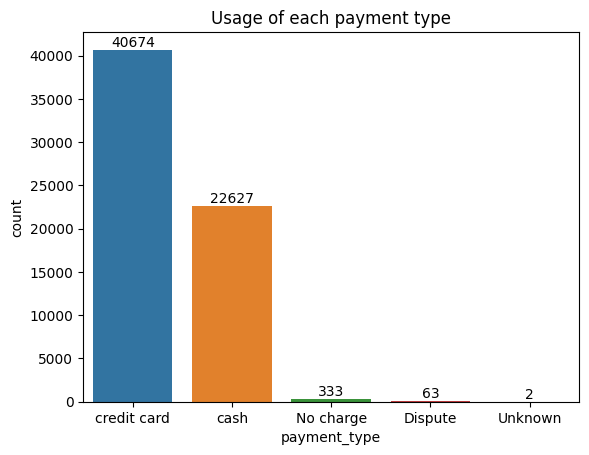

In [43]:
ax = sns.countplot(data= df, x ='payment_type')
plt.title('Usage of each payment type')
plt.xticks([0,1,2,3,4], ['credit card','cash','No charge','Dispute','Unknown'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Berdasarkan persentase, 3 tipe pembayaran tertinggi adalah melalui credit card (63.85%), cash (35.52%), no charge(0.52%). Tipe pembayaran dispute hanya 0.1% atau sejumlah 63 trip dan tipe pembayaran unknown sebesar 0 % atau sejumlah 2 trip.

In [44]:
# Melihat data dengan payment type dispute
df[df['payment_type']==4.0].T

,899,1687,1920,3762,5354,6502,7996,8168,8335,10017,...,56317,57892,58221,58768,60285,60963,61124,63300,63359,63869
VendorID,2,2,2,2,1,2,2,2,2,2,...,1,2,1,2,2,2,2,1,2,2
lpep_pickup_datetime,2023-01-01 17:24:52,2023-01-02 12:56:53,2023-01-02 14:03:10,2023-01-03 14:25:22,2023-01-04 11:18:23,2023-01-04 18:35:37,2023-01-05 14:03:43,2023-01-05 15:01:39,2023-01-05 16:05:34,2023-01-06 12:06:25,...,2023-01-28 04:37:09,2023-01-28 22:22:19,2023-01-29 03:10:02,2023-01-29 14:09:12,2023-01-30 11:39:45,2023-01-30 15:57:52,2023-01-30 17:25:59,2023-01-31 18:02:43,2023-01-31 18:39:16,2023-01-31 23:44:44
lpep_dropoff_datetime,2023-01-01 17:25:12,2023-01-02 13:00:10,2023-01-02 14:03:26,2023-01-03 14:27:53,2023-01-04 11:20:42,2023-01-04 18:36:08,2023-01-05 14:08:18,2023-01-05 15:02:16,2023-01-05 16:15:46,2023-01-06 12:06:59,...,2023-01-28 04:53:07,2023-01-28 22:22:39,2023-01-29 03:25:02,2023-01-29 14:09:44,2023-01-30 11:39:49,2023-01-30 16:00:00,2023-01-30 17:26:17,2023-01-31 18:02:51,2023-01-31 18:39:29,2023-01-31 23:45:15
store_and_fwd_flag,N,N,N,N,N,N,N,N,N,N,...,N,N,N,N,N,N,N,Y,N,N
RatecodeID,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5.0
PULocationID,193,75,75,42,41,74,236,166,95,42,...,256,70,74,75,74,41,75,244,130,264
DOLocationID,193,75,75,42,74,74,238,166,196,42,...,198,70,248,75,74,41,75,244,130,264
passenger_count,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0
trip_distance,0.0,0.77,0.0,0.32,0.2,0.0,0.75,0.13,0.61,0.08,...,3.7,0.01,5.3,0.24,0.0,0.37,0.0,0.0,0.05,0.0
fare_amount,3.0,4.5,3.0,4.4,4.4,3.0,6.5,3.0,9.3,3.0,...,19.1,3.0,22.6,3.7,3.0,4.4,3.0,3.0,3.0,10.0


Dapat dilihat bahwa ketika vendorID adalah 2 maka drop off dan pickup locationID akan sama sedangkan ketika vendorID adalah 1 maka dropoff dan pickup location ID akan berbeda.

In [45]:
print(f"Percentage of trips with the same PU and DO location ID for VendorID 1:{round(df[(df['payment_type']==4.0) & (df['VendorID']==1)& (df['PULocationID']==df['DOLocationID'])]['extra'].count()/len(df[(df['payment_type']==4.0)& (df['VendorID']==1)]['extra'])*100,2)}")
print(f"Percentage of trips with the same PU and DO location ID for VendorID 2:{round(df[(df['payment_type']==4.0) & (df['VendorID']==2)& (df['PULocationID']==df['DOLocationID'])]['extra'].count()/len(df[(df['payment_type']==4.0)& (df['VendorID']==2)]['extra'])*100,2)}")


Percentage of trips with the same PU and DO location ID for VendorID 1:38.71
Percentage of trips with the same PU and DO location ID for VendorID 2:87.5


In [46]:
# Melihat biaya dikenakan untuk ke JFK yaitu ratecodeID 2
df[(df['RatecodeID']==2)]['fare_amount'].value_counts()

fare_amount
70.0    153
52.0      3
Name: count, dtype: int64

Biaya untuk tujuan JFK yaitu flat rate 70.00 sesuai regulasi oleh tlc(1) sudah sesuai karena hampir seluruhnya bernilai \$ 70
1. https://www.nyc.gov/site/tlc/passengers/taxi-fare.page#:~:text=%245.00%20rush%20hour%20surcharge%20(4pm,Plus%20tips%20and%20any%20tolls.

_________________________________

,fare_amount,trip_distance
fare_amount,1.00,0.85
trip_distance,0.85,1.00


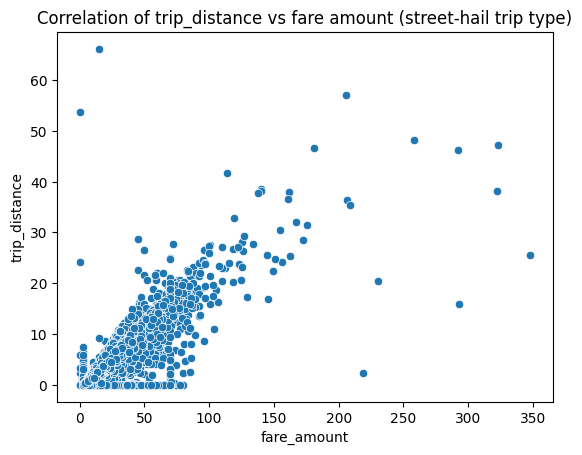

In [47]:
# Melihat hubungan tarif vs jarak trip (trip type street hail)
sns.scatterplot(data = df[df['trip_type']==1], x = 'fare_amount',y = 'trip_distance')
dfd = df[df['trip_type']==1]
plt.title('Correlation of trip_distance vs fare amount (street-hail trip type)')
round(dfd[['fare_amount','trip_distance']].corr('spearman'),2)


,fare_amount,trip_distance
fare_amount,1.00,0.29
trip_distance,0.29,1.00


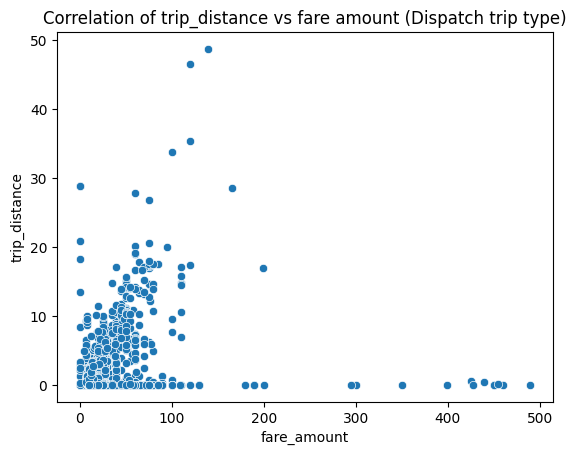

In [48]:
# Melihat hubungan tarif vs jarak trip (trip type Dispatch)
sns.scatterplot(data = df[df['trip_type']==2], x = 'fare_amount',y = 'trip_distance')
dfs = df[df['trip_type']==2]
plt.title('Correlation of trip_distance vs fare amount (Dispatch trip type)')
round(dfs[['fare_amount','trip_distance']].corr('spearman'),2)

Dari dua grafik scatterplot jarak trip vs tarif yang dikenakan dimana grafik 1 hanya mewakili trip type 'street hail' dan grafik 2 hanya mewakili trip type 'dispatch', terlihat keduanya memiliki kekuatan korelasi positif yang berbeda. Perhitungan korelasi dengan spearmann grafik 1 adalah 0.85 dan grafik 2 adalah 0.29 (spearmann digunakan sebab distribusi data masing-masing fare_amount dan trip_distance tergolong tidak normal)

Hal ini menandakan adanya perbedaan tarif pada kedua trip type tersebut yaitu pada 'dispatch' yang tidak sesuai jarak (Walau jarak trip dekat, dikenakan biaya tinggi. Ketika jarak jauh dikenakan biaya lebih rendah dari seharusnya.)

Saran : memberikan standar tarif yang sama antar trip type 'dispatch' dan 'street hail'

#### 2. Taxi trend

In [49]:
# Melihat trend penggunaan taksi
trend = df.groupby('lpep_pickup_hour')['VendorID'].count().reset_index()
trend.rename(columns = {'VendorID':'Number of trips'}, inplace = True)


Text(0.5, 1.0, 'Taxi usage trend based on hour')

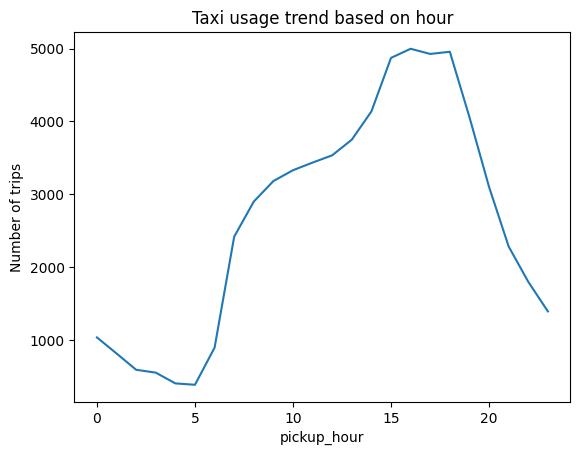

In [50]:
# Trend penggunaan taksi berdasarkan jam pickup vs Jumlah trip
sns.lineplot(data = trend, x ='lpep_pickup_hour', y ='Number of trips')
plt.xlabel('pickup_hour')
plt.title('Taxi usage trend based on hour')

Penggunaan taksi umumnya akan menurun pada jam 00.00 hingga 05.00 dan meningkat menjelang jam 15.00 setelah jam 05.00. 
Trend akan menurun setelah jam 18.00 dan selanjutnya.

Rekomendasi : Dapat diperbanyak armada dan driver taksi pada jam 15.00 hingga 18.00 dan menurunkan jumlah keduanya pada jam 20.00 hingga jam 05.00

Berikut trend rata-rata biaya yang dibayarkan oleh setiap penumpang dari jam ke jam yang digambarkan dengan median karena distribusi data yang tidak normal. 
- Dapat dilihat bahwa penumpang taksi cenderung membayar harga yang lebih tinggi pada saat penggunaan taksi menurun yang dapat terlihat pada grafik 'taxi usage trend based on hour' yaitu pada jam 05.00 dan mengalami penurunan setelah jam tersebut akan tetapi mengalami peningkatan dan penurunan yang moderat hingga jam 00.00.

**CEKICEKI**

Text(0.5, 0, 'pickup_hour')

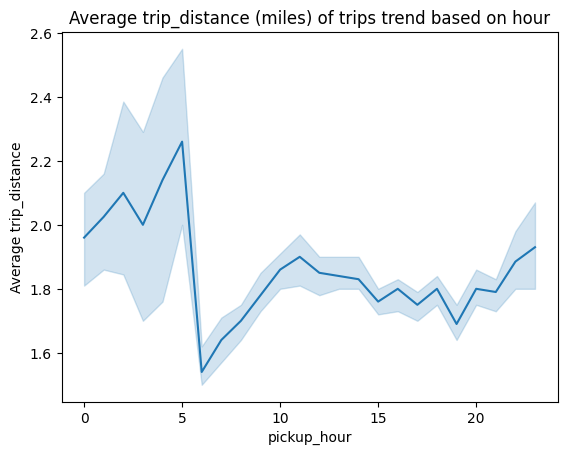

In [51]:
# Trend rata-rata (digambarkan dengan median) trip_distance untuk trip taksi berdasarkan jam pickup vs rata-rata 'total_amount'
sns.lineplot(data = df, x ='lpep_pickup_hour', y ='trip_distance',estimator ='median')
plt.ylabel('Average trip_distance')
plt.title('Average trip_distance (miles) of trips trend based on hour')
plt.xlabel('pickup_hour')

Grafik 'Average total amount paid based on hour trend' dan 'Average trip_distance (miles) of trips trend based on hour' selaras dalam hal memiliki peak pada jam 05.00.

Setelah jam tersebut trend menurun dan mengalami peningkatan kembali tapi tidak terlalu drastis, bahkan stagnan dari jam 10.00 hingga jam 00.00.

______


In [52]:
# Jumlah trip per kategori waktu
timeday = df.groupby('Time of the day')['VendorID'].count().reset_index()
timeday1 = timeday.loc[[2,0,1,3],['Time of the day','VendorID']]
timeday1.rename(columns = {'VendorID':'Total trips'},inplace = True)
timeday1

,Time of the day,Total trips
2,Morning,15256
0,Afternoon,26218
1,Evening,9016
3,Overnight,13209


Text(0.5, 1.0, 'Total trips for each "time" category (morning, afternoon, evening, overnight)')

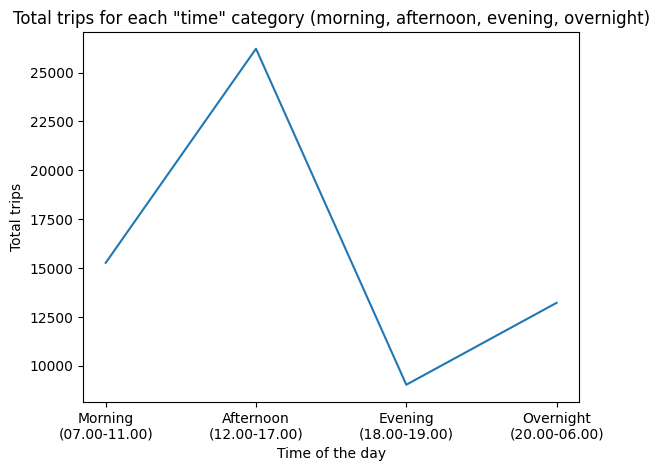

In [53]:
sns.lineplot(data = timeday1, x ='Time of the day', y = 'Total trips', estimator = 'sum')
plt.xticks([0,1,2,3],['Morning\n(07.00-11.00)','Afternoon\n(12.00-17.00)','Evening\n(18.00-19.00)','Overnight\n(20.00-06.00)'])
plt.title('Total trips for each "time" category (morning, afternoon, evening, overnight)')

Terdapat banyak penumpang pada jam 12.00 hingga 17.00 (peak grafik), dan waktu malam hari terjadi demand taksi terendah

[Text(0, 0, '7749'),
 Text(0, 0, '9347'),
 Text(0, 0, '10570'),
 Text(0, 0, '9274'),
 Text(0, 0, '9515'),
 Text(0, 0, '9282'),
 Text(0, 0, '7962')]

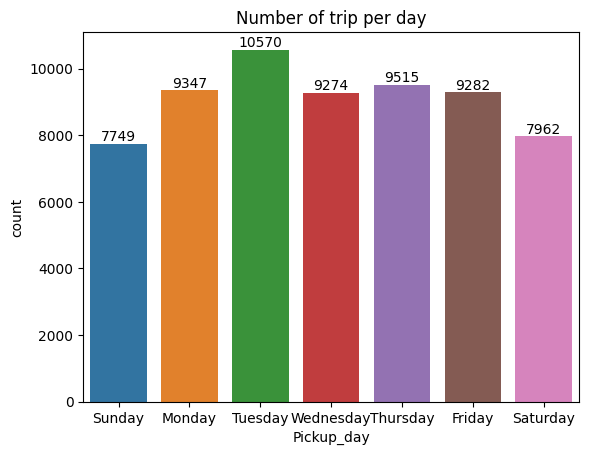

In [54]:
ax = sns.countplot(data =df,x ='Pickup_day')
plt.title('Number of trip per day')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Jumlah trip paling banyak terjadi pada hari selasa yaitu 10570, dimana weekdays (senin, selasa, rabu, kamis, jumat) hampir terlihat uniform. Jumlah trip pada hari weekend (sabtu dan minggu) lebih rendah yaitu 7962 dan 7749 secara berurutan.

Text(0.5, 1.0, 'Total Revenue from taxis each day')

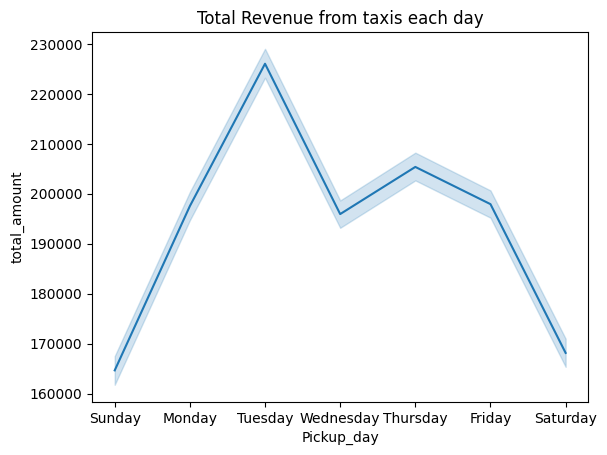

In [55]:
# Penghasilan total per hari
sns.lineplot(data = df, x ='Pickup_day', y = 'total_amount', estimator = 'sum')
plt.title('Total Revenue from taxis each day')

Berdasarkan grafik diatas yaitu jumlah atau sum dari total_amount (revenue taksi) vs hari, puncak penghasilan dari armada-armada adalah menjelang hari senin ke selasa. 

Selanjutnya total penghasilan akan menurun pada hari rabu dan kembali meningkat secara perlahan pada hari kamis. Setelah kamis, total penghasilan akan menurun cukup banyak. 


Rekomendasi : meningkatkan jumlah driver di afternoon (peaknya)
Rekomendasi : saran dari findings

#### 3. Most Common Number of Passenger per Ride

Text(0.5, 1.0, 'Number of passengers per ride based on passenger_count')

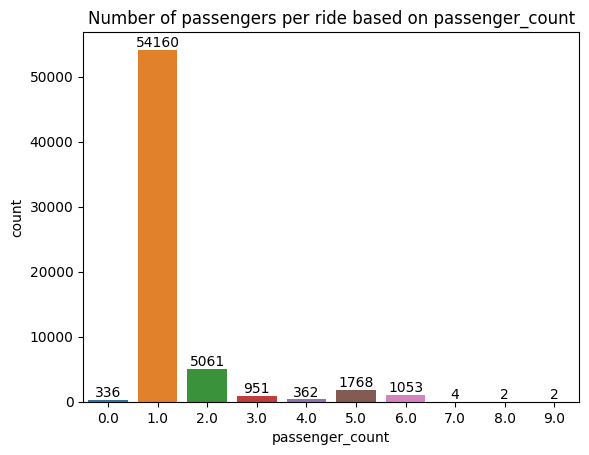

In [56]:
# Berdasarkan passenger_count
ax = sns.countplot(x = df['passenger_count'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of passengers per ride based on passenger_count')


Taksi menjadi pilihan bagi penumpang solo dengan jumlah penumpang 54160. Kedua diikuti oleh penumpang dua orang, selanjutnya 5 orang, 6 orang, 3 orang, dan 4 orang  

([<matplotlib.axis.XTick at 0x1914ce1f250>,
 [Text(0, 0, 'Standar rate\n(Code 1)'),
  Text(1, 0, 'JFK\n(Code 2)'),
  Text(2, 0, 'Newark\n(Code 3)'),
  Text(3, 0, 'Nassau\nor\nWestchester\n(Code 4)'),
  Text(4, 0, 'Negotiated\nfare\n(Code 5)')])

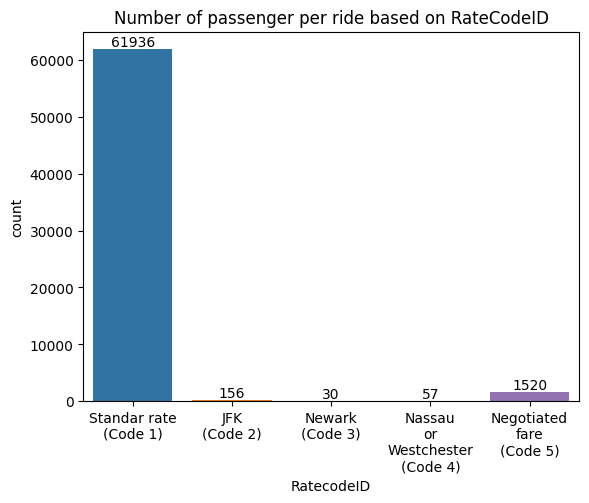

In [57]:
# Berdasarkan RateCodeID
ax = sns.countplot(x = df['RatecodeID'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of passenger per ride based on RateCodeID')
plt.xticks([0,1,2,3,4],['Standar rate\n(Code 1)','JFK\n(Code 2)','Newark\n(Code 3)','Nassau\nor\nWestchester\n(Code 4)','Negotiated\nfare\n(Code 5)'])

Pada RatecodeID, seharusnya terdapat data 'Group Ride' dengan code = 6 yang menandakan bahwa trip tersebut memiliki lebih dari satu penumpang dimana tarifnya akan dibagi sesuai jumlah penumpang. Bar plot di atas menunjukkan tidak ada pengguna group ride atau memang tidak tersedia datanya.  

#### 4. Distance wise usage

Text(0.5, 0, 'pickup_hour')

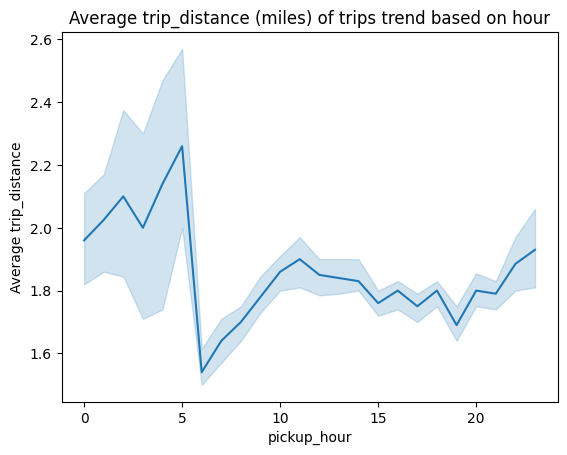

In [58]:
# Trend rata-rata (digambarkan dengan median) trip_distance untuk trip taksi berdasarkan jam pickup vs rata-rata 'total_amount'
sns.lineplot(data = df, x ='lpep_pickup_hour', y ='trip_distance',estimator ='median')
plt.ylabel('Average trip_distance')
plt.title('Average trip_distance (miles) of trips trend based on hour')
plt.xlabel('pickup_hour')

Grafik 'Average total amount paid based on hour trend' dan 'Average trip_distance (miles) of trips trend based on hour' selaras dalam hal memiliki peak pada jam 05.00.

Setelah jam tersebut trend menurun dan mengalami peningkatan kembali tapi tidak terlalu drastis, bahkan stagnan dari jam 10.00 hingga jam 00.00.

Inti : Terdapat orang-orang yang memilih untuk berpergian jauh di jam 5 pagi

Text(0.5, 1.0, 'Trip_distance vs each payment type')

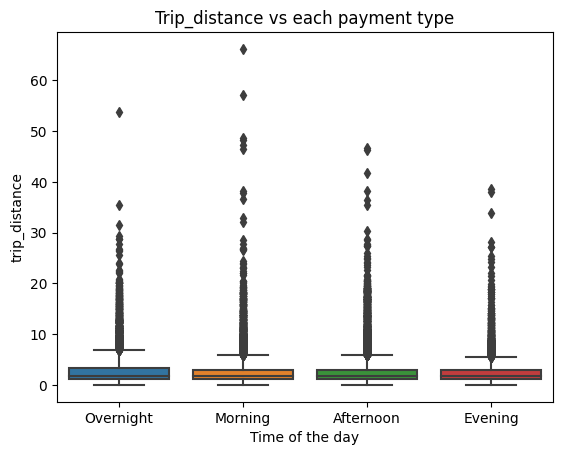

In [59]:
# Melihat lebih lanjut terkait penumpang yang berpergian jauh pada jam 5 atau kategori (morning)
sns.boxplot(data= df, x = 'Time of the day', y = 'trip_distance')
plt.title('Trip_distance vs each payment type')

Terlihat tidak terlalu banyak orang berpergian jauh di pagi hari bahwa tidak dapat disimpulkan bahwa pada pagi hari orang-orang memilih berpergian jauh.

**CEKII**

'Median of trip_distance = 1.8'

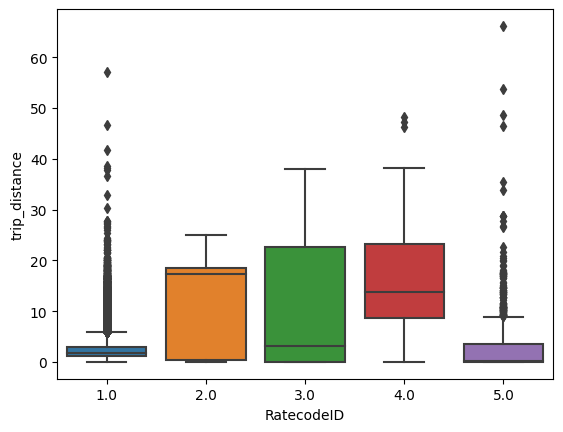

In [60]:
#Terlihat bahwa penumpang yang berpergian jauh akan memilih untuk membayar dengan cash dibanding membayar dengan 
sns.boxplot(data = df, x = 'RatecodeID', y = 'trip_distance')
display(f"Median of trip_distance = {df['trip_distance'].median()}")

#### 5. Tipping point

Text(0.5, 1.0, 'Number of trips with and without tips vs payment_type')

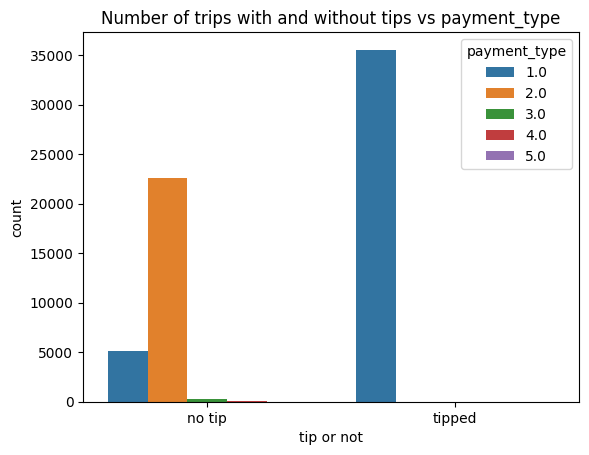

In [61]:
# Melihat hubungan pemberian tip dengan jenis pembayaran
sns.countplot(data = df, x = 'tip or not', hue = 'payment_type')
plt.xticks([0,1],['no tip','tipped'])
plt.title('Number of trips with and without tips vs payment_type')


Terdapat lebih banyak orang yang memberi tip dibanding tidak memberi tip

Penumpang memiliki kecenderungan memberi tip ketika menggunakan pembayaran 1 (credit card) sedangkan kecenderungan tidak memberi tip ketika menggunakan pembayaran 2 (cash). 

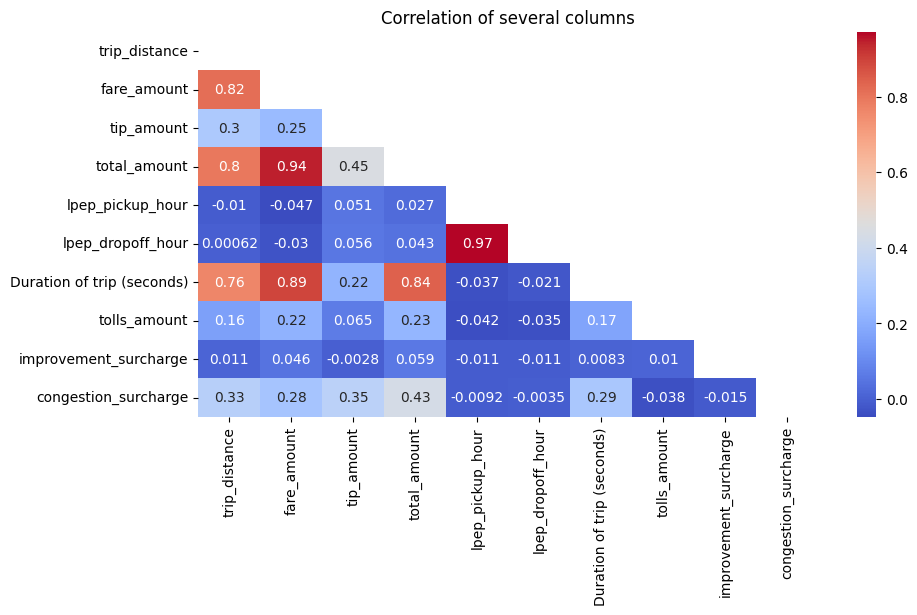

In [62]:
# Melihat heatmap untuk menentukan korelasi dari beberapa kolom 
angka = ['trip_distance','fare_amount','tip_amount','total_amount','lpep_pickup_hour','lpep_dropoff_hour','Duration of trip (seconds)','tolls_amount','improvement_surcharge','congestion_surcharge']
plt.figure(figsize=(10,5))
data_corr = df[angka].corr('spearman')
matrix = np.triu(data_corr)
sns.heatmap(
    data_corr, 
    annot=True, 
    cmap = 'coolwarm', 
mask = matrix)
plt.title('Correlation of several columns')

plt.show()

Dari heatmap di atas, dapat dilihat korelasi yang positif yang kuat antara : (nilai > 0.7)
1. trip_distance vs fare_amount atau total_amount atau Duration of trip
2. fare_amount vs duration of trip atau total_amount
3. total_amount vs duration of trip 
4. lpep_pickup_hour vs lpep_dropoff_hour

sedangkan korelasi yang positif tetapi lemah adalah antara: (nilai sekitar 0.3)
1. tip_amount vs duration of trip atau trip_distance atau fare_amount



###  V. Regulation-Oriented

[Text(0, 0, '1582'),
 Text(0, 0, '53036'),
 Text(0, 0, '25'),
 Text(0, 0, '9055'),
 Text(0, 0, '1')]

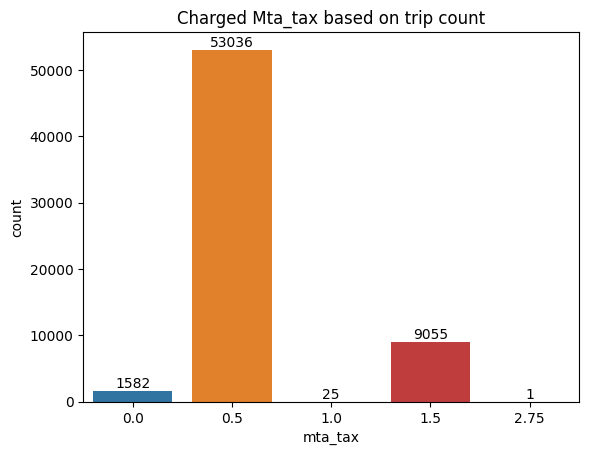

In [63]:
ax =sns.countplot(data = df, x='mta_tax')
plt.title('Charged Mta_tax based on trip count')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Mta_tax yang paling sering dikenakan adalah sebesar \$ 0.5 maka sesuai dengan regulasi. Tetapi terdapat biaya pajak ini yang melebihi \$0.5 seperti \$1.0, \$1.5, dan \$2.75. Dapat dilihat cukup banyak trip yang dikenakan biaya pajak MTA 1.5 (3 x yang seharusnya)

In [64]:
# Hubungan antara between mta_tax dan vendorID
dfmta = pd.crosstab(df['VendorID'],df['mta_tax'])
dfmta.T

VendorID,1,2
mta_tax,,
0.00,76,1506
0.50,48,52988
1.00,25,0
1.50,9055,0
2.75,1,0


**Crosstabulasi**
- MTA tax yang dikenakan jika provider data adalah VendorID 1 atau CMT selalu bervariasi dari \$0.00 hingga \$2.75. mta_tax sebesar \$ 1.5 yang paling sering dikenakan pada trip (9055 trips). 
- Berbeda jika dibandingkan dengan VendorID 2 atau Verifone selalu mengenakan biaya mta_tax antara \$ 0.00 atau \$ 0.5.
 

([<matplotlib.axis.XTick at 0x1914c86d0d0>,
 [Text(0, 0, 'CMT'), Text(1, 0, 'Verifone')])

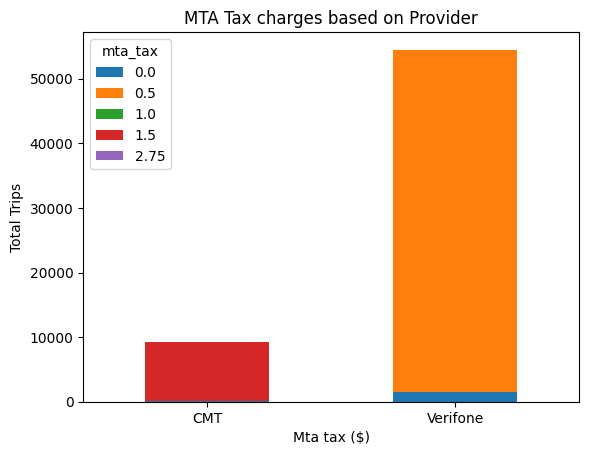

In [65]:
# Hubungan antara between mta_tax dan vendorID 
ax = dfmta.plot(kind = 'bar', stacked = True) 
plt.title('MTA Tax charges based on Provider')
plt.xlabel('Mta tax ($)')
plt.ylabel('Total Trips') 
plt.xticks([0,1],['CMT','Verifone'], rotation = 0)


**Bar Plot**:
- Jumlah trip yang terkena mta_tax melebihi regulasi ($ 1.5, bar merah) adalah trip yang didata oleh provider CMT (VendorID 1).
- Berbeda dengan provider Verifone yang mengenakan mta_tax paling tinggi pada $ 0.5 (sehingga sudah sesuai regulasi) 

In [66]:
# Hubungan antara between mta_tax dan vendorID (hanya tipe trip 2 atau 'dispatch')
dfdis = df[df['trip_type']==2]
dfmta = pd.crosstab(dfdis['VendorID'],dfdis['mta_tax'])
dfmta.T

VendorID,1,2
mta_tax,,
0.0,57,1328
0.5,0,4
1.5,4,0


**Crosstabulasi:**
- Banyak trip yang tidak dikenakan mta_tax (mta_tax sebesar 0.00 berjumlah 57 dan 1328 untuk masing-masing provider). Sedangkan biaya mta_tax yang seharusnya yaitu \$0.5 hanya dikenakan pada 4 jumlah trip oleh provider 2 dan 4 trip lainnya dikenakan \$ 1.5 oleh provider 1. 

([<matplotlib.axis.XTick at 0x1914c79b290>,
 [Text(0, 0, 'CMT'), Text(1, 0, 'Verifone')])

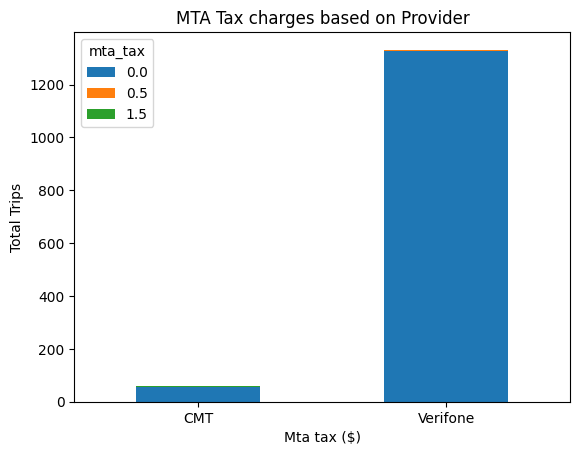

In [67]:
# Hubungan antara between mta_tax dan vendorID (hanya tipe trip 2 atau 'dispatch')
ax = dfmta.plot(kind = 'bar', stacked = True) 
plt.title('MTA Tax charges based on Provider')
plt.xlabel('Mta tax ($)')
plt.ylabel('Total Trips') 
plt.xticks([0,1],['CMT','Verifone'], rotation = 0)

**Bar Plot:**
- Kedua provider mayoritas mengenakan biaya mta_tax 0.00 sehingga tidak sesuai regulasi

[Text(0, 0, '186'), Text(0, 0, '3880'), Text(0, 0, '59633')]

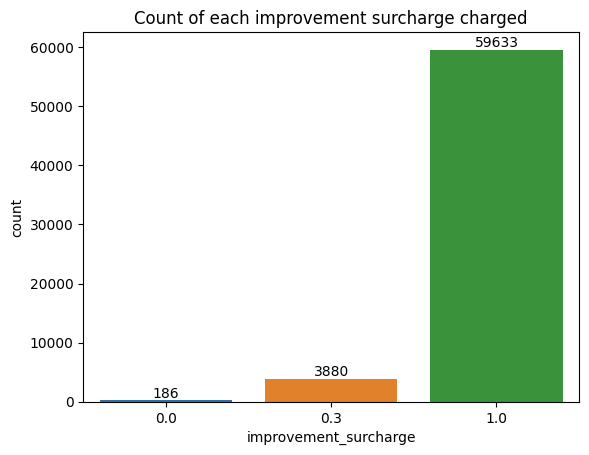

In [68]:
# Melihat biaya improvement yang dikenakan
ax =sns.countplot(data = df, x = 'improvement_surcharge')
plt.title('Count of each improvement surcharge charged')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')


Biaya improvement_surcharge yang paling sering dikenakan adalah \$ 1.00 telah sesuai dengan aturan yang ada sekarang dimana sebelumnya adalah \$ 0.3. 

In [69]:
df[df['improvement_surcharge']==0.3]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,Dropoff_date,Pickup_day,Dropoff_day,lpep_pickup_hour,lpep_dropoff_hour,lpep_pickup_time,lpep_dropoff_time,Duration of trip (seconds),Time of the day,tip or not
32,2,2023-01-01 00:40:58,2023-01-01 01:04:32,N,5.0,66,164,4.0,6.78,60.0,...,01,Sunday,Sunday,0,1,00:40:58,01:04:32,1414.0,Overnight,1
41,2,2023-01-01 00:08:05,2023-01-01 00:13:26,N,1.0,41,75,6.0,1.05,5.5,...,01,Sunday,Sunday,0,0,00:08:05,00:13:26,321.0,Overnight,1
43,2,2023-01-01 00:16:10,2023-01-01 00:54:55,N,5.0,66,48,3.0,6.19,75.0,...,01,Sunday,Sunday,0,0,00:16:10,00:54:55,2325.0,Overnight,0
115,2,2023-01-01 01:52:58,2023-01-01 01:53:00,N,1.0,264,264,1.0,0.00,3.0,...,01,Sunday,Sunday,1,1,01:52:58,01:53:00,2.0,Overnight,1
147,2,2023-01-01 02:01:43,2023-01-01 02:03:43,N,5.0,179,7,1.0,0.32,25.0,...,01,Sunday,Sunday,2,2,02:01:43,02:03:43,120.0,Overnight,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63851,2,2023-01-31 23:06:51,2023-01-31 23:17:06,N,1.0,166,74,1.0,1.88,9.0,...,31,Tuesday,Tuesday,23,23,23:06:51,23:17:06,615.0,Overnight,1
63852,2,2023-01-31 23:42:20,2023-01-31 23:55:05,N,1.0,166,74,1.0,2.20,10.5,...,31,Tuesday,Tuesday,23,23,23:42:20,23:55:05,765.0,Overnight,0
63864,2,2023-01-31 23:05:02,2023-01-31 23:11:31,N,1.0,75,239,1.0,1.48,9.3,...,31,Tuesday,Tuesday,23,23,23:05:02,23:11:31,389.0,Overnight,1
63865,2,2023-01-31 23:34:50,2023-01-31 23:47:23,N,1.0,75,48,1.0,3.79,17.7,...,31,Tuesday,Tuesday,23,23,23:34:50,23:47:23,753.0,Overnight,0


Text(0.5, 1.0, 'Charged extras each time of the day (trip_type = street hail)')

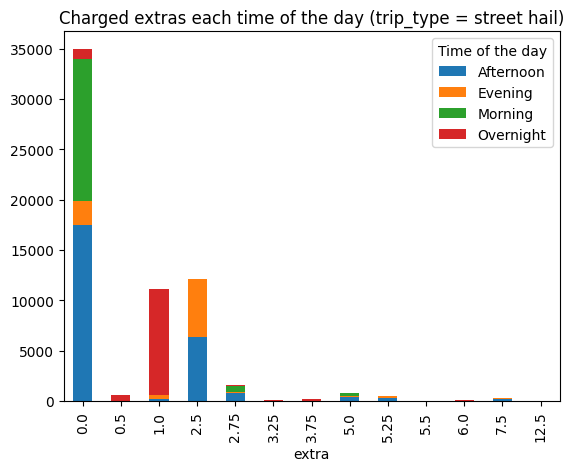

In [70]:
# Melihat biaya extra yang dikenakan untuk tipe trip 'street hail'
df1 = df[df['trip_type']==1]
dfex = pd.crosstab(df1['extra'],df1['Time of the day'])
dfex.plot(kind = 'bar', stacked = 'True')
plt.title('Charged extras each time of the day (trip_type = street hail)')

Biaya extra yang dapat dikenakan adalah \$ 1.00 (untuk overnight) atau \$ 2.50 (untuk rush hour) total yaitu \$3.50.

Terlihat bahwa : 
- Biaya extra \$ 1.00 dikenakan jika trip terjadi pada waktu overnight (sudah sesuai regulasi)
- Biaya extra \$2.5 dikenakan jika trip terjadi pada waktu Evening dan Afternoon (sudah sesuai regulasi)
- Terdapat biaya yang melebihi 2.5 yaitu 2.75 hingga 12.5

In [71]:
# Melihat apakah biaya melebihi $ 2.5 (contohnya $2.75) adalah congestion surcharge (karena biayanya sama yaitu $ 2.75)
df[df['congestion_surcharge']==2.75]['extra'].value_counts()


extra
0.00    8991
2.50    3170
1.00    2306
2.75    1573
5.25     496
3.75     220
0.50      63
3.25      52
Name: count, dtype: int64

Terlihat bahwa jika biaya congestion_surcharge = \$ 2.75, biaya extranya beragam. Hal ini menandakan bahwa biaya extra tidak termasuk biaya congestion_surcharge. 

Inti : biaya extra yang melebihi \$ 3.50 tidak sesuai regulasi 

Text(0.5, 1.0, 'Each congestion_surcharge charged')

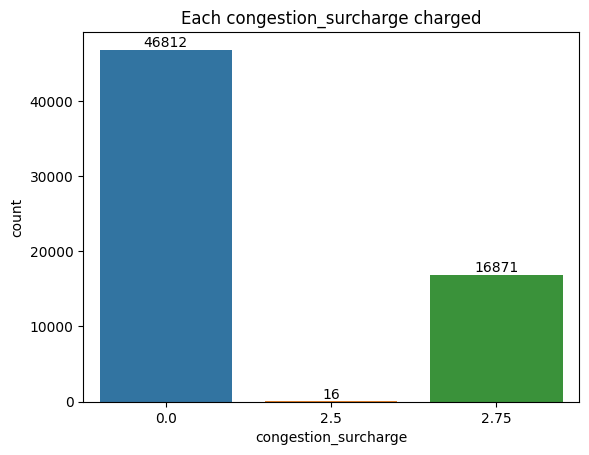

In [72]:
# Melihat jumlah setiap congestion_surcharge
ax =sns.countplot(data = df, x = 'congestion_surcharge')
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Each congestion_surcharge charged')

Congestion_surcharge yang diberikan sudah sesuai karena tidak melebihi \$ 2.75

### VI. System-Oriented

Text(0.5, 1.0, 'Number of data with each VendorID')

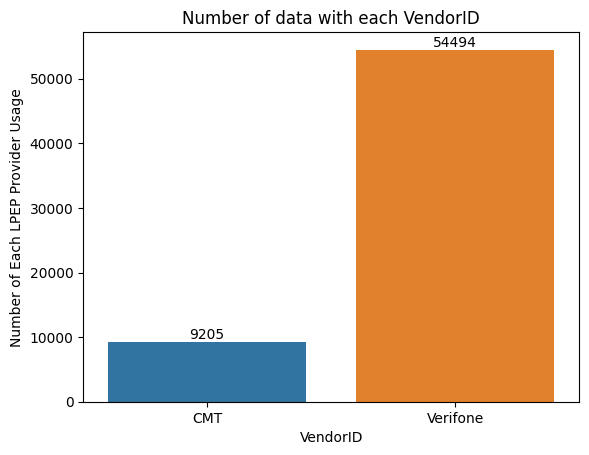

In [73]:
# Vendor ID yang lebih banyak
ax =sns.countplot(x=df['VendorID'])
plt.ylabel('Number of Each LPEP Provider Usage')
plt.xticks([0,1],['CMT','Verifone'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')
plt.title('Number of data with each VendorID')

Vendor yang lebih sering digunakan adalah Verifone.Inc

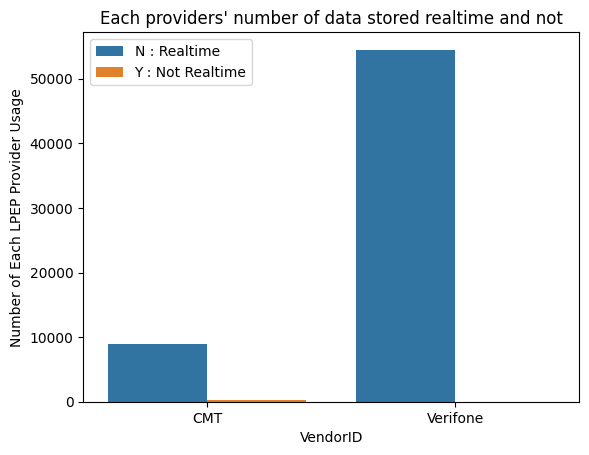

In [74]:
# Melihat jumlah trip per vendor ID yang difilter berdasarkan store_fwd_flag
sns.countplot(x=df['VendorID'], hue = df['store_and_fwd_flag'])
plt.ylabel('Number of Each LPEP Provider Usage')
plt.xticks([0,1],['CMT','Verifone'])
plt.title("Each providers' number of data stored realtime and not")
plt.legend(['N : Realtime','Y : Not Realtime'])

Y : bukan realtime data (disimpan di memory sementara(memory kendaraan) sebelum disampaikan ke vendor)
N : Realtime data

Kedua provider sama-sama memiliki lebih banyak realtime data (N) dibanding bukan realtime (Y). Akan tetapi provider CMT memiliki ratio data tidak realtime(N) yang lebih banyak dibanding provider Verifone padahal Verifone menanggulangi lebih banyak data. 

[Text(0, 0, '62306'), Text(0, 0, '1393')]

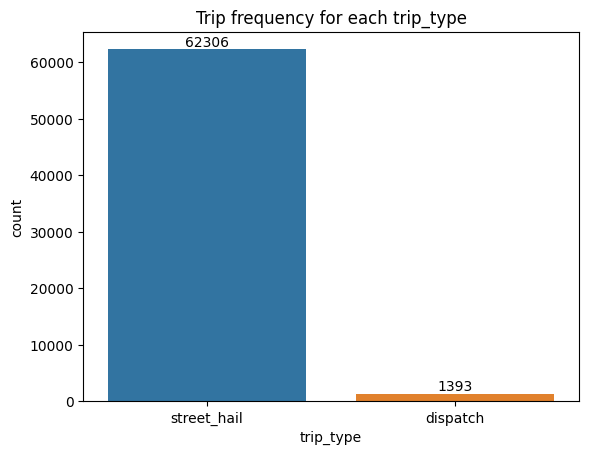

In [75]:
# Frekuensi dari dispatch dan street hail trip type
ax =sns.countplot(x = df['trip_type'])
plt.title('Trip frequency for each trip_type')
plt.xticks([0.0,1.0],labels=['street_hail','dispatch'])
ax.bar_label(ax.containers[0], fmt= '%0.0f', label_type='edge')

Jenis trip yang lebih sering terjadi adalah street_hail (yaitu ketika penumpang langsung memesan taksi di tempat) dibanding dispatch (yaitu penumpang yang memesan taksi via aplikasi atau layanan telepon)

## **IV. Conclusion & Recommendation**

**Pelanggan :** 
1.	Tarif dan tip
-	Penumpang yang tidak puas dengan tarif yang dikenakan (dispute) hanya 0.1%. 
-	Pembayaran : Kartu kredit yang paling dipilih dibanding pembayaran lainnya. Peringkat kedua ditempati oleh pembayaran cash.
-	Pembayaran dengan kartu kredit meningkatkan keinginan penumpang untuk memberi tip. 
-	Tarif tetap (flat fee) : penerapan flat fee pada airport JFK sudah sesuai ketentuan (yaitu $70), hanya 3 trip yang dikenakan tidak sesuai ($52)
-	Standar Tarif yang dikenakan pada tipe trip street_hail dan dispatch tidak serupa (ditentukan oleh korelasi).
2.	Trend penggunaan taksi
- Peak penggunaan transportasi ada di jam 15.00-17.00 sedangkan pitnya adalah pada jam 05.00
- Jika sesuai kategori waktu, afternoon (12.00-17.00) adalah peak penggunaan transportasi. Dengan pit ada pada overnight (20.00 -06.00)
- Banyak demand taksi cukup uniform pada weekdays (senin hingga jumat) dengan jumlah trip tertinggi ada di hari selasa. Weekend jumlah pengguna transportasi lebih rendah. 
- Walau perbedaan jumlah trip tidak terlalu berbeda antara hari-hari weekdays, Revenue armada di hari selasa terlihat jauh lebih tinggi dibanding hari lainnya dan revenue weekend jauh lebih rendah dibanding weekdays.
3. Jumlah penumpang
- Jumlah penumpang yang paling umum adalah 1 orang. Trip dengan penumpang lebih dari 1 cukup jarang. Terdapat jumlah penumpang 0 yang mungkin mengartikan pengiriman barang. 
- Tidak terdapat RatecodeID 6 yaitu ‘group ride’. 
*diperlukan data lebih lanjut terkait group ride atau sangat kurangnya pengguna group ride.
4. Jarak 
- Orang-orang yang berpergian jauh ada pada jam 05.00 akan tetapi jumlahnya tidak banyak (masuk ke daerah outlier yaitu diatas Q3 + 1.5x IQR)



**Regulasi:**
1.	MTA-Tax
- Biaya mta-tax yang disediakan provider Vendor 1 atau CMT cenderung tidak sesuai regulasi (melebihi $ 0.5), sedangkan Verifone cenderung sesuai regulasi
- Mta_tax cenderung tidak terkena charge pada trip_type 2 atau dispatch. 
2.	Improvement_surcharge
- Mayoritas improvement_surcharge yang dikenakan sudah sesuai yaitu \$1.00 (per 2022) dimana sebelumnya $ 0.30
3. Extra 
- Biaya extra \$1.00 (overnight charge) yang dikenakan sudah sesuai regulasi sebab mayoritas dikenakan pada kategori waktu overnight
- Biaya extra \$2.50 (rush hour charge) yang dikenakan sudah sesuai regulasi sebab mayoritas dikenakan pada kategori waktu afternoon (12.00-17.00) dan evening (18.00-19.00) (jam 16.00 – 20.00 ditetapkan sebagai rush hour oleh TLC)
- Terdapat biaya extra yang tidak sesuai ketentuan, bervariasi dari \$ 2.75 hingga \$ 12.5
4. Congestion_surcharge 
- Sudah sesuai yaitu \$2.75 (green taxi) atau \$ 2.50 (yellow taxi)


**Vendor :**
1.	Provider yang paling sering dipakai adalah Verifone.
2.	Kedua provider lebih banyak menyediakan realtime data dibanding disimpan dahulu di memory sementara pada kendaraan. Tetapi CMT memiliki ratio penyimpanan data secara non real-time yang lebih tinggi dibandingkan Verifone
3.	Penerapan pemesanan trip taxi dispatch (1393 trip) (yaitu pemesanan online atau melalui layanan telepon) jauh lebih sedikit dibandingkan street-hail (62306 trip)



#### **Rekomendasi**

Secara keseluruhan, layanan taksi nyc masih belum maksimal dan dapat ditingkatkan dalam hal :

1. Mendiskusikan ke pihak provider CMT terkait terkait pemberian pajak seperti mta_tax yang tidak sesuai aturan (melebihi \$ 0.5) oleh provider mereka.
2. Mengutamakan pengunaan provider Verifone sebab dapat menanggulangi banyak data dengan konsisten dalam menyediakan data realtime dan penerapan biaya seperti mta_tax yang sesuai aturan
3. Menambah jumlah armada pada hari selasa dan pada jam-jam rush hour (15.00 -17.00) dan mengurangi jumlah armada yang beredar pada weekend dan pada jam 05.00.
4. Menyediakan data group-ride atau melakukan pemasaran terkait keuntungan dari group-ride (seperti tarif yang lebih murah) jika memang belum ada pengguna group-ride
5. Meregulasi lebih lanjut tipe trip 'dispatch' dimana mta_tax hampir selalu tidak dikenakan serta pemberian tarif yang dibuat lebih setara dengan tipe trip' street-hail
6. Melakukan cutoff billing biaya extra hingga tidak akan melebihi aturan misal maksimal biaya extra yang dapat masuk sistem adalah \$ 3.50, tidak lebih.
